<span style="background-color: lightgreen"><font size =6>NLP Topic Modeling</font></span>

**Steps:**<br>
<font size = 5> Part I </font>
* What is topic modeling? Machine Learing? NLP?
* Read Data
* Data Cleaning
* Tokenize
* Stemming

<font size = 5> Part II </font>
* Create the Document-Word matrix
* Build LDA model with sklearn
* Diagnose model performance with perplexity and log-likelihood
* Use GridSearch to determine the best LDA model.
* Dominant topic
* Predict Topics using LDA model
* How to cluster documents that share similar topics and plot?
* Get similar documents for any given piece of text?

# What is AI / Machine Learning?

* Artificial intelligence is the simulation of human intelligence processes by machines, especially computer systems
* Machine learning is an application of Artificial Intelligence where we give machines access to data and let them use that data to learn for themselves. It's basically getting a computer to perform a task without explicitly being programmed to do so.

**Machine Learning 
Supervised vs Unsupervised**

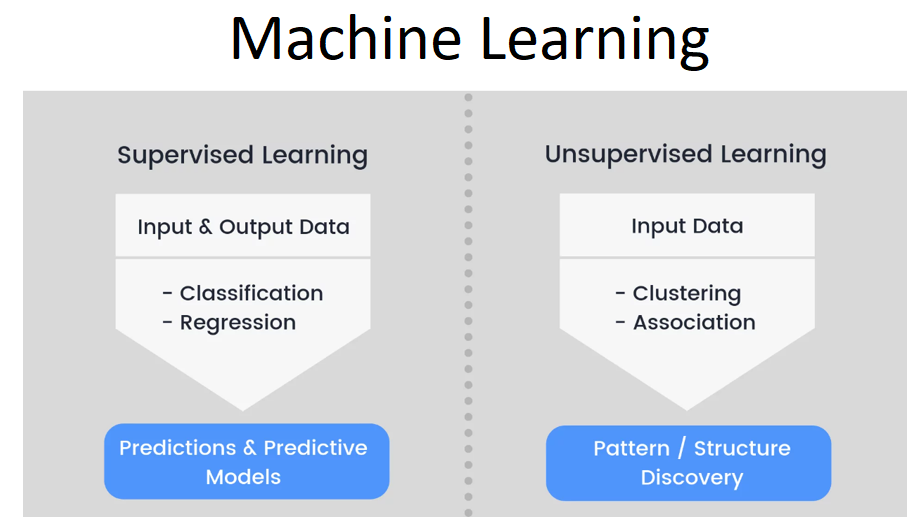

In [1]:
import os
from IPython.display import Image, display, Markdown

DOCUMENTS_PATH = os.getcwd() 
display(Markdown("**Machine Learning \nSupervised vs Unsupervised**"))
display(Image(f"{DOCUMENTS_PATH}/machinelearing.png"))

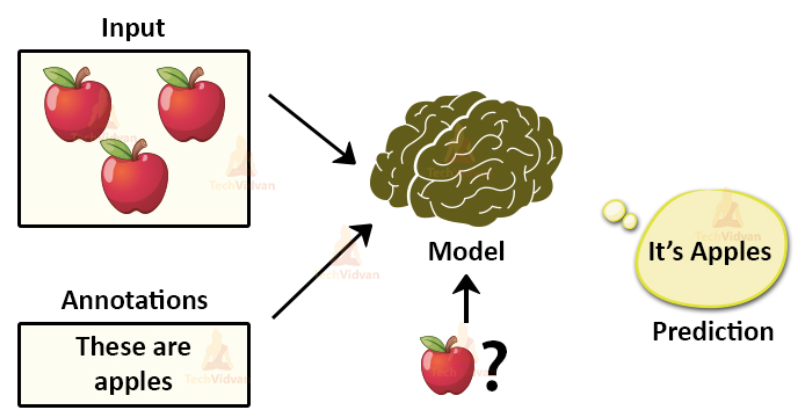

In [2]:
display(Image(f"{DOCUMENTS_PATH}/supervised.png"))

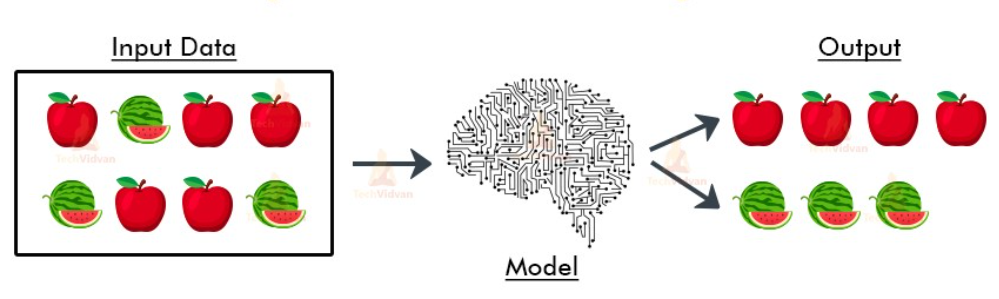

In [3]:
display(Image(f"{DOCUMENTS_PATH}/unsupervised.png"))

`Areas of AI:`
* Machine Learning. 
* Deep learning. 
* Neural Networks. 
* Cognitive Computing. 
* Natural Language Processing. 
* Computer Vision.

# What is NLP?

* Natural language processing (NLP) is the ability of a computer program to understand human language as it is spoken and written -- referred to as natural language.

* Areas:<br>
•	Searching.  
•	Machine translation.  
•	Summarization.  
•	Named-Entity Recognition.  
•	Parts-of-Speech tagging (POS).  
•	Information retrieval.  
•	Information grouping.  
•	Sentiment analysis.  
•	Answering queries.  
•	Automated speech recognition (ASR 


# What is topic modeling?
`https://monkeylearn.com/blog/introduction-to-topic-modeling/`
`https://monkeylearn.com/blog/introduction-to-topic-modeling/`
* Topic modeling is an unsupervised machine learning technique that’s capable of scanning a set of documents, detecting word and phrase patterns within them, and automatically clustering word groups and similar expressions that best characterize a set of documents
--versus--
* Topic classification models require training, they’re known as ‘supervised’ machine learning techniques. What does that mean? Well, as opposed to text modeling, topic classification needs to know the topics of a set of texts before analyzing them. Using these topics, data is tagged manually so that a topic classifier can learn and later make predictions by itself.

* How Does Topic Modeling Work?
It’s simple, really. Topic modeling involves counting words and grouping similar word patterns to infer topics within unstructured data. 

# Get Libs

In [37]:
import numpy as np
import pandas as pd
import re
import os
import nltk  
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer
from nltk.corpus import wordnet  
#nltk.download('stopwords')
from nltk.corpus import stopwords

lemmatizer = WordNetLemmatizer()
porter = PorterStemmer()

import gensim
from pathlib import Path
import string 

# Sklearn
from sklearn.decomposition import LatentDirichletAllocation, TruncatedSVD
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import GridSearchCV
from pprint import pprint

# Plotting tools
import pyLDAvis
import pyLDAvis.sklearn
import matplotlib.pyplot as plt 

import warnings
warnings.filterwarnings('ignore')

In [ ]:
!pip install pyLDAvis  --upgrade

In [4]:
DOCUMENT_PATH = os.getcwd()  
DOCUMENT_PATH

'c:\\dscamp\\lessons\\session12'

# Read data

In [5]:
def read_rawdata(file = None):
    """
        read college data
        input: file
        output: tabular pandas
    """
    if not file:
        file = Path(DOCUMENT_PATH, "US_College_WikiSummary.csv")
        #file = Path(DOCUMENT_PATH, "USCollegesWithSummary.csv")
    df = pd.read_csv(file, error_bad_lines=False) 
    #df = df.dropna(subset=["Summary"])
    df = df[df["Wiki_Summary"] != "not available"]
    return df

# Data Cleaning

In [9]:
def clean_data(df = pd.DataFrame()):
    """
        clean emails and special charaters
        input: df
        output: text data 
    """
    if df.empty:
        df = read_rawdata()
   
    # Convert to list
    data =  df["Wiki_Summary"].values  
    
    #make it simple: just the a-zA-Z
    data = [re.sub('[^a-zA-Z]+', ' ', str(s)).strip() for s in data] 
    
    # space
    data = [re.sub(r'\s+', ' ', sent) for sent in data] 
      
    return data

In [10]:
DATA = clean_data() 

# Tokenize

* Tokenization is the act of breaking up a sequence of strings into pieces such as words, keywords, phrases, symbols and other elements called tokens. Tokens can be individual words, phrases or even whole sentences. In the process of tokenization, some characters like punctuation marks are discarded.

In [21]:
import nltk 
stops = set(stopwords.words('english')) 

In [11]:
import nltk 
stops = set(stopwords.words('english'))

def tokenize_wiki():
    DATA = clean_data()  
    return [remove_stop_words(nltk.word_tokenize(one_college)) for one_college in DATA]  

def remove_stop_words(word_list):
    return [w for w in word_list if ((len(w)>2) and (w not in stops))]

#try it ! 
tokenized_wors = tokenize_wiki() 

# Lemmatize or Stemming

## Lemmatize 
* Lemmatize: to reduce the different forms of a word to one single form, for example, reducing "builds," "building," or "built" to the lemma "build"
* Key benefits: reduce number of vocabulary
* what about Stemming?
* example:

In [17]:
import nltk 
def get_wordnet_pos(word):
    """Map POS tag to first character lemmatize() accepts"""
    tag = nltk.pos_tag([word])[0][1][0].upper()
    tag_dict = {"J": wordnet.ADJ,
                "N": wordnet.NOUN,
                "V": wordnet.VERB,
                "R": wordnet.ADV}

    return tag_dict.get(tag, wordnet.NOUN)

In [18]:
sentence = "I tried very hard looking for substute coaches" 
print([lemmatizer.lemmatize(w, get_wordnet_pos(w)) for w in nltk.word_tokenize(sentence)])

['I', 'try', 'very', 'hard', 'look', 'for', 'substute', 'coach']


* analyze line 2 above
* for loop
* in nltk.word_tokenize(sentence)
* lemmatize(w, ...)
* get_worknet_pos(w)

In [19]:
def lemma_wiki_summaries():
    tokenized = tokenize_wiki()
    lemmatized_all = []
    for one_summary in tokenized:
        lemmatized =  [lemmatizer.lemmatize(w, get_wordnet_pos(w)) for w in one_summary]
        lemmatized_all.append(' '.join(lemmatized))
    return lemmatized_all

# try it!
abc = lemma_wiki_summaries()
 

## Stemming

* Stemming is the process of reducing a word to its word stem that affixes to suffixes and prefixes or to the roots of words known as a lemma.

* The advantage of this is, we get to reduce the total number of unique words in the dictionary. As a result, the number of columns in the document-word matrix (created by CountVectorizer in the next step) will be denser with lesser columns. You can expect better topics to be generated in the end.

In [11]:
def stemming_wiki_summaries():
    tokenized = tokenize_wiki()
    stemmed_all = []
    for one_summary in tokenized:
        stemmed =  [porter.stem(w) for w in one_summary]
        
        #join back to sentence 
        stemmed_all.append(' '.join(stemmed.lower()))
    return stemmed_all

# try it! stemmed_all = stemming_wiki_summaries()
# stemmed_all[0]

## what to choose?
* Lemmatization is preferred. It transform to a "real word". while STEM doesn't gurrantee. 

# Create the Document-Word <font color = red>matrix </font>
* what is it?

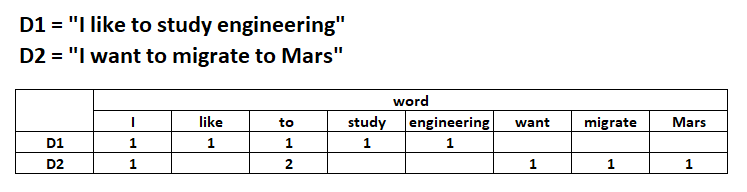

In [20]:
display(Image(f"{DOCUMENTS_PATH}/doc_word.png"))

* important: vectorizer.fit_transform(parameter)
* parameter is list of sentences

In [21]:
def vectorization():  
    wiki_summaries = lemma_wiki_summaries()
        
    vectorizer = CountVectorizer(analyzer='word',       
                             min_df=10, # minimum reqd occurences of a word 
                             stop_words='english', # remove stop words
                             lowercase=True, # convert all words to lowercase
                             token_pattern='[a-zA-Z0-9]{3,}',  # num chars > 3 
                                 # max_features=50000, # max number of uniq words    
                            ) 
    data_vectorized = vectorizer.fit_transform(wiki_summaries)
    return data_vectorized, vectorizer                          

In [22]:
data_vectorized, vectorizer = vectorization()

In [ ]:
# https://machinelearninggeek.com/latent-dirichlet-allocation-using-scikit-learn/ 

# Build LDA model with sklearn

* Everything is ready to build a Latent Dirichlet Allocation (LDA) model. Let’s initialise one and call fit_transform() to build the LDA model.
* Latent Dirichlet Allocation (LDA) is a popular form of statistical topic modeling. In LDA, documents are represented as a mixture of topics and a topic is a bunch of words. Those topics reside within a hidden, also known as a latent layer. 

* LDA looks at a document to determine a set of topics that are likely to have generated that collection of words. So, if a document uses certain words that are contained in a topic, you could say the document is about that topic.

* Though a topic is composed of words, the likely distribution of those words is not equal. For example, the topic “domesticated animals” may have a probability of 50% dog, 30% cat, 20% goldfish.

* LDA consists of two parts, the words within a document (a known factor) and the probability of words belonging to a topic, which is what needs to be calculated. The algorithm tries to determine, for a given document, how many words belong to a specific topic. Plus it attempts to determine how many documents belong to a specific topic because of a certain word.

In [23]:
# Build LDA Model
lda_model = LatentDirichletAllocation(n_components=20,  # Number of topics
                                      max_iter=10, # Max learning iterations
                                      learning_method='online',  # Random state
                                      batch_size=128,  # n docs in each learning iter
                                      evaluate_every = -1, # compute perplexity every n iters, default: Don't
                                      n_jobs = -1,  # Use all available CPUs
                                     )  
lda_model = LatentDirichletAllocation(n_components=20, random_state=0)
lda_model.fit(data_vectorized)
pyLDAvis.display(pyLDAvis.sklearn.prepare(lda_model, data_vectorized, vectorizer)) 

LatentDirichletAllocation(n_components=20, random_state=0)

# Sum Up

In [25]:
import nltk 
# stop words
stops = set(stopwords.words('english')) 

"""
    read raw data --> clean data --> tokenize --> lemmatize --> vectorize --> model
"""

def read_rawdata(file = None):
    """
        read college data
        input: file
        output: tabular pandas
    """
    if not file:
        file = Path(DOCUMENT_PATH, "US_College_WikiSummary.csv")
        #file = Path(DOCUMENT_PATH, "USCollegesWithSummary.csv")
    df = pd.read_csv(file, error_bad_lines=False) 
    #df = df.dropna(subset=["Summary"])
    df = df[df["Wiki_Summary"] != "not available"]
    return df

def clean_data(df = pd.DataFrame()):
    """
        clean emails and special charaters
        input: df
        output: text data 
    """
    if df.empty:
        df = read_rawdata()
   
    # Convert to list
    data =  df["Wiki_Summary"].values  
    
    #make it simple: just the a-zA-Z
    data = [re.sub('[^a-zA-Z]+', ' ', str(s)).strip() for s in data] 
    
    # space
    data = [re.sub(r'\s+', ' ', sent) for sent in data] 
      
    return data



def tokenize_wiki():
    DATA = clean_data()  
    return [remove_stop_words(nltk.word_tokenize(one_college)) for one_college in DATA]  

def remove_stop_words(word_list):
    return [w for w in word_list if ((len(w)>2) and (w not in stops))]

def get_wordnet_pos(word):
    """Map POS tag to first character lemmatize() accepts"""
    tag = nltk.pos_tag([word])[0][1][0].upper()
    tag_dict = {"J": wordnet.ADJ,
                "N": wordnet.NOUN,
                "V": wordnet.VERB,
                "R": wordnet.ADV}

    return tag_dict.get(tag, wordnet.NOUN)

def lemma_wiki_summaries():
    tokenized = tokenize_wiki()
    lemmatized_all = []
    for one_summary in tokenized:
        lemmatized =  [lemmatizer.lemmatize(w, get_wordnet_pos(w)) for w in one_summary]
        lemmatized_all.append(' '.join(lemmatized))
    return lemmatized_all
 

def vectorization():  
    wiki_summaries = lemma_wiki_summaries()
        
    vectorizer = CountVectorizer(analyzer='word',       
                             min_df=10, # minimum reqd occurences of a word 
                             stop_words='english', # remove stop words
                             lowercase=True, # convert all words to lowercase
                             token_pattern='[a-zA-Z0-9]{3,}',  # num chars > 3 
                                 # max_features=50000, # max number of uniq words    
                            ) 
    data_vectorized = vectorizer.fit_transform(wiki_summaries)
    return data_vectorized, vectorizer   


In [35]:
def py_lda_college_topics():
    """
        step by step
    """
    data_vectorized, vectorizer = vectorization()
    
    lda_model = LatentDirichletAllocation(n_components=20,  # Number of topics
                                      max_iter=10, # Max learning iterations
                                      learning_method='online',  # Random state
                                      batch_size=128,  # n docs in each learning iter
                                      evaluate_every = -1, # compute perplexity every n iters, default: Don't
                                      n_jobs = -1,  # Use all available CPUs
                                     )  
    
    lda_model = LatentDirichletAllocation(n_components=20, random_state=0)
    
    lda_model.fit(data_vectorized)
    return pyLDAvis.sklearn.prepare(lda_model, data_vectorized, vectorizer) 
 
     

In [38]:
college_topic = py_lda_college_topics()
pyLDAvis.display(college_topic)

# Lets' explain it

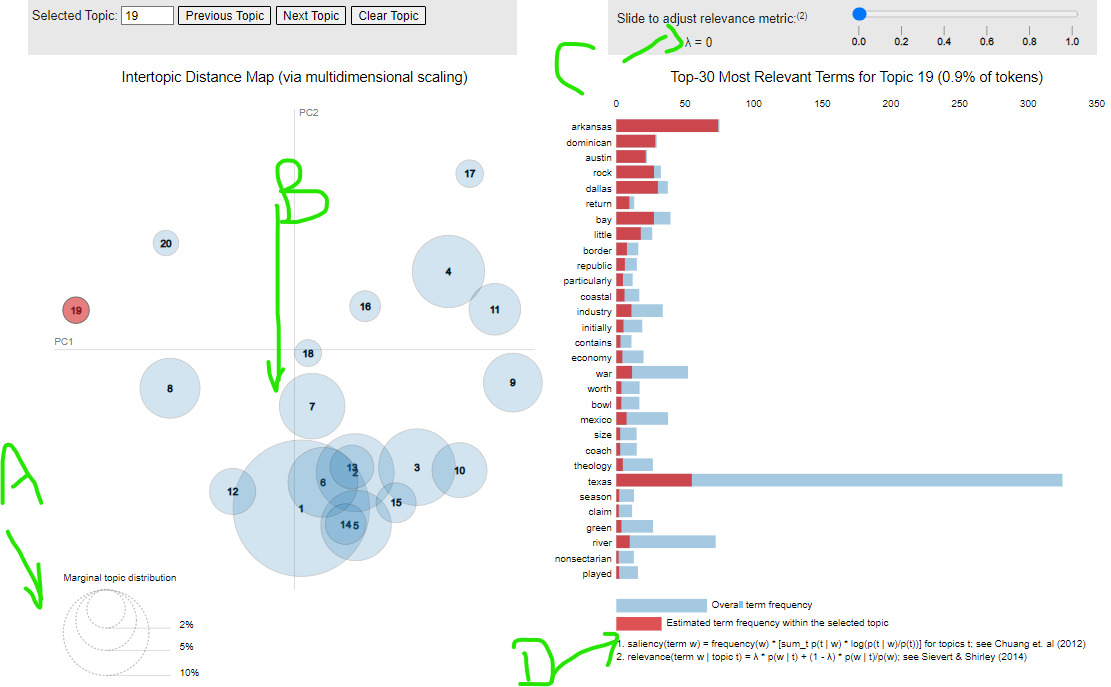

In [39]:
display(Image(f"{DOCUMENTS_PATH}/collegeVisual.png"))

`A`
<br> size of cirles. percent of documents
`B`
<br> relationship (distances) between topics
`C`
<br>lambda : relavance and lift (how different)
